In [ ]:
!pip install yfinance matplotlib numpy

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

[*********************100%***********************]  6 of 6 completed


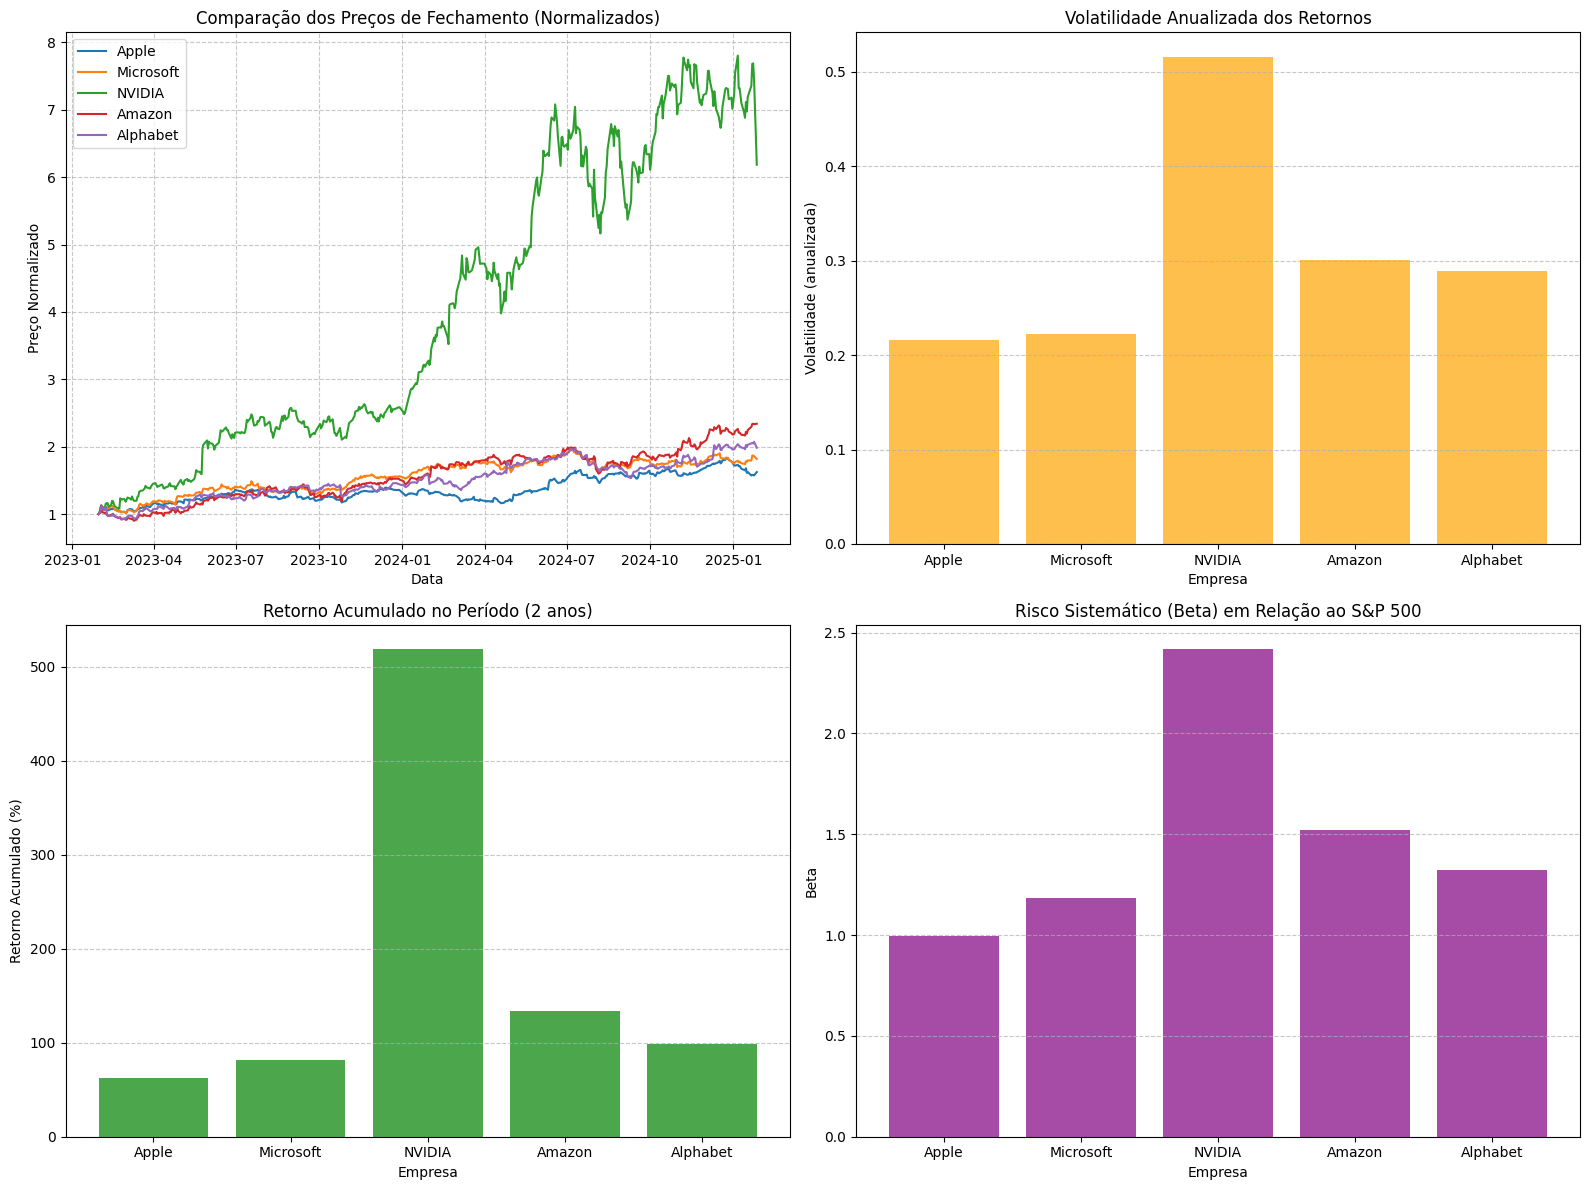

In [ ]:
# Definindo os tickers dos ativos e do benchmark (S&P 500)
tickers = {
    "Apple": "AAPL",
    "Microsoft": "MSFT",
    "NVIDIA": "NVDA",
    "Amazon": "AMZN",
    "Alphabet": "GOOGL",
    "S&P 500": "^GSPC"  # Benchmark para o risco sistemático
}

# Baixando dados históricos dos últimos 2 anos
dados = yf.download(list(tickers.values()), period="2y", group_by='ticker')

# Criando gráficos e calculando métricas
plt.figure(figsize=(16, 12))

# Gráfico 1: Comparação dos preços de fechamento (normalizados)
plt.subplot(2, 2, 1)  # 2 linhas, 2 colunas, posição 1
for empresa, ticker in tickers.items():
    if ticker != "^GSPC":  # Ignorar o S&P 500 neste gráfico
        preco_normalizado = dados[ticker]['Close'] / dados[ticker]['Close'].iloc[0]  # Normalizando os preços
        plt.plot(preco_normalizado, label=empresa)
plt.title('Comparação dos Preços de Fechamento (Normalizados)')
plt.xlabel('Data')
plt.ylabel('Preço Normalizado')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)

# Gráfico 2: Volatilidade (desvio padrão dos retornos diários)
plt.subplot(2, 2, 2)  # 2 linhas, 2 colunas, posição 2
volatilidades = {}
for empresa, ticker in tickers.items():
    if ticker != "^GSPC":  # Ignorar o S&P 500 neste gráfico
        retornos = dados[ticker]['Close'].pct_change().dropna()
        volatilidades[empresa] = retornos.std() * np.sqrt(252)  # Volatilidade anualizada
plt.bar(volatilidades.keys(), volatilidades.values(), color='orange', alpha=0.7)
plt.title('Volatilidade Anualizada dos Retornos')
plt.xlabel('Empresa')
plt.ylabel('Volatilidade (anualizada)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 3: Retorno acumulado no período
plt.subplot(2, 2, 3)  # 2 linhas, 2 colunas, posição 3
retornos_acumulados = {}
for empresa, ticker in tickers.items():
    if ticker != "^GSPC":  # Ignorar o S&P 500 neste gráfico
        retorno_acumulado = (dados[ticker]['Close'].iloc[-1] / dados[ticker]['Close'].iloc[0] - 1) * 100
        retornos_acumulados[empresa] = retorno_acumulado
plt.bar(retornos_acumulados.keys(), retornos_acumulados.values(), color='green', alpha=0.7)
plt.title('Retorno Acumulado no Período (2 anos)')
plt.xlabel('Empresa')
plt.ylabel('Retorno Acumulado (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 4: Risco Sistemático (Beta)
plt.subplot(2, 2, 4)  # 2 linhas, 2 colunas, posição 4
betas = {}
retornos_sp500 = dados['^GSPC']['Close'].pct_change().dropna()  # Retornos do S&P 500
for empresa, ticker in tickers.items():
    if ticker != "^GSPC":  # Ignorar o S&P 500 neste cálculo
        retornos_acao = dados[ticker]['Close'].pct_change().dropna()
        covariancia = np.cov(retornos_acao, retornos_sp500)[0, 1]
        variancia_sp500 = np.var(retornos_sp500)
        beta = covariancia / variancia_sp500
        betas[empresa] = beta
plt.bar(betas.keys(), betas.values(), color='purple', alpha=0.7)
plt.title('Risco Sistemático (Beta) em Relação ao S&P 500')
plt.xlabel('Empresa')
plt.ylabel('Beta')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustando o layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()